# Tarea 13: Modelo Beta-Binomial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import binom, beta

# Parte 1

Una compañía farmacéutica afirma que su nueva medicina incrementa la probabilidad de concebir un niño (sexo masculino), pero aún no publican estudios. Supón que conduces un experimento en el cual $50$ parejas se seleccionan de manera aleatoria de la población, toman la medicina y conciben. Nacen $30$ niños y $20$ niñas.
1) Quieres estimar la probabilidad de concebir un niño para parejas que toman la medicina. ¿Cuál es una inicial apropiada?, experimenta con la distribución Beta para elegir. No tiene que estar centrada en `0.5` pues esta corresponde a personas que no toman la medicina, y la inicial debe reflejar tu incertidumbre sobre el efecto de la droga.

Utilizando datos de nacimientos del [INEGI](https://www.inegi.org.mx/sistemas/olap/consulta/general_ver4/MDXQueryDatos.asp?proy=nat_nac), nos podemos dar una idea de la proporción de nacimientos de niños y niñas en México.

In [2]:
nacimientos = pd.read_csv("../datos/INEGI_exporta_11_11_2022_11_57_13.txt", sep='\t', index_col=0, engine='python', skiprows=7, skipfooter=4, encoding='latin-1')
nacimientos.columns = nacimientos.columns.str.strip().astype(int)
nacimientos.index = nacimientos.index.str.strip()

for column in nacimientos.columns:
    nacimientos[column] = nacimientos[column].str.replace(",", "").astype(int)

nacimientos['total'] = nacimientos.apply(sum, axis=1)
nacimientos[[1985,2021,'total']]

,1985,2021,total
,,,
Total,2655571,1912178,94735990
Hombre,1332681,969457,47685316
Mujer,1301690,942718,47004750
No especificado,21200,3,45924


In [3]:
hombres = nacimientos['total'].Hombre
mujeres = nacimientos['total'].Mujer

p = hombres / (hombres + mujeres)
print(f"Proporción de varones: {p:.4f}")

Proporción de varones: 0.5036


De acuerdo con los datos del INEGI, la proporción de varones está centrada en `0.5036`, con lo que se puede decir que en la población en general hay más nacimientos de niños que de niñas.

Para $50$ nacimientos, y dado que no puede hacer fracciones de nacimiento, podemos considerar que el número de nacimientos de niños es de $a=26$

In [4]:
n = 50
a = 26
b = n - a

print(f"Con valores a: {a} y b: {b}, se tiene una distribución beta centrada en {beta.stats(a, b)[0]}")

Con valores a: 26 y b: 24, se tiene una distribución beta centrada en 0.52


Examinamos la forma que tomaría la distribución inicial:

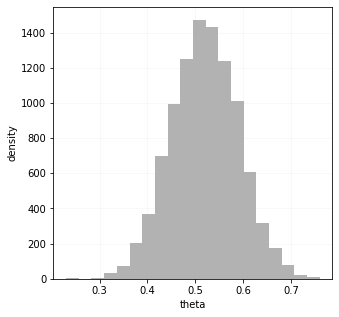

In [5]:
#Simulación inicial de datos
sim_inicial = beta.rvs(a, b, size=10_000)

fig, ax = plt.subplots(figsize=(5,5))

#Contenido de figura
ax.hist(x=sim_inicial, bins=20, color='grey', alpha=0.6)

#Anotaciones y estilo
ax.set_xlabel('theta')
ax.set_ylabel('density')
ax.grid(alpha=0.1)

plt.show()

Con probabilidad 0.95 se puede creer que la proporción de niños $\theta$ está entre valores:

In [6]:
pd.DataFrame(sim_inicial).quantile([0.025, 0.975]).rename(columns={0:'theta'}).T

,0.025,0.975
theta,0.382228,0.657817
